Importing and preparing data for the visualization

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# defining path
path =r'C:\Users\dog\Desktop\Boat sales'

In [4]:
# importing cleaned data
df_boats_cleaned = pd.read_csv(os.path.join(path, '02 Prepared Data', 'df_boats_countriesclean.csv'))

In [5]:
df_boats_cleaned.head()

,Unnamed: 0,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337.0,Switzerland
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany
2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367.0,Denmark
3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany
4,6,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600.0,Switzerland


In [6]:
df_boats_cleaned['value_in_eur'] = df_boats_cleaned['value_in_eur'].round(0)

In [7]:
df_boats_cleaned['value_in_eur'] = df_boats_cleaned['value_in_eur'].astype(int)

In [8]:
# Checking mixed data 
for col in df_boats_cleaned.columns.tolist():
      weird = (df_boats_cleaned[[col]].applymap(type) != df_boats_cleaned[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_boats_cleaned[weird]) > 0:
        print (col)

In [9]:
df_boats_cleaned = df_boats_cleaned.dropna()

In [10]:
df_boats_cleaned.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [11]:
df_boats_cleaned.head()

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337,Switzerland
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490,Germany
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367,Denmark
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399,Germany
4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600,Switzerland


In [12]:
df_boats_cleaned.describe()

,year_built,length,width,views_last_7_days,value,value_in_eur
count,9192.000000,9192.000000,9192.000000,9192.000000,9.192000e+03,9.192000e+03
mean,2004.941036,11.738778,3.595622,147.749130,3.206748e+05,3.017992e+05
std,16.400792,6.000763,1.309842,149.196469,9.752226e+05,9.331982e+05
min,1885.000000,1.040000,0.010000,13.000000,3.300000e+03,3.300000e+03
25%,1999.000000,7.600000,2.550000,70.000000,4.500000e+04,4.499375e+04
50%,2008.000000,10.500000,3.400000,107.000000,9.895000e+04,9.582950e+04
75%,2018.000000,14.000000,4.270000,170.000000,2.596000e+05,2.495258e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07,3.100000e+07


In [13]:
df_boats_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9192 entries, 0 to 9191
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   boat_type          9192 non-null   object 
 1   manufacturer       9192 non-null   object 
 2   type               9192 non-null   object 
 3   year_built         9192 non-null   int64  
 4   length             9192 non-null   float64
 5   width              9192 non-null   float64
 6   material           9192 non-null   object 
 7   views_last_7_days  9192 non-null   int64  
 8   currency           9192 non-null   object 
 9   value              9192 non-null   int64  
 10  value_in_eur       9192 non-null   int32  
 11  country            9192 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 826.0+ KB


# Exploratory analysis

In [14]:
# Create a correlation matrix using pandas

df_boats_cleaned.corr()

,year_built,length,width,views_last_7_days,value,value_in_eur
year_built,1.000000,-0.208121,-0.103574,-0.109053,0.106112,0.104398
length,-0.208121,1.000000,0.798272,-0.137143,0.540167,0.561637
width,-0.103574,0.798272,1.000000,-0.146290,0.463714,0.479145
views_last_7_days,-0.109053,-0.137143,-0.146290,1.000000,-0.011913,-0.006118
value,0.106112,0.540167,0.463714,-0.011913,1.000000,0.951661
value_in_eur,0.104398,0.561637,0.479145,-0.006118,0.951661,1.000000


In [15]:
df_boats_cor = df_boats_cleaned[['year_built', 'length','width','views_last_7_days','value','value_in_eur']]

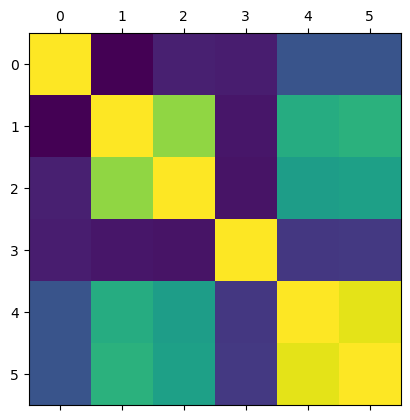

In [16]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_boats_cor.corr())
plt.show()

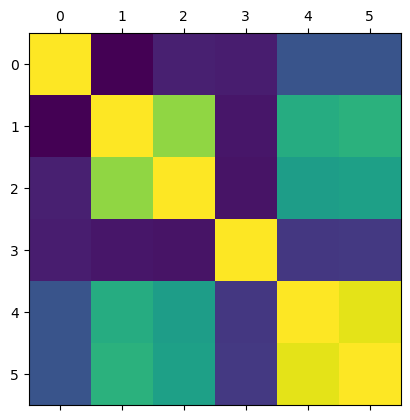

In [17]:
# Save figure
plt.matshow(df_boats_cor.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [18]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\dog\\Desktop\\Boat sales\\04 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

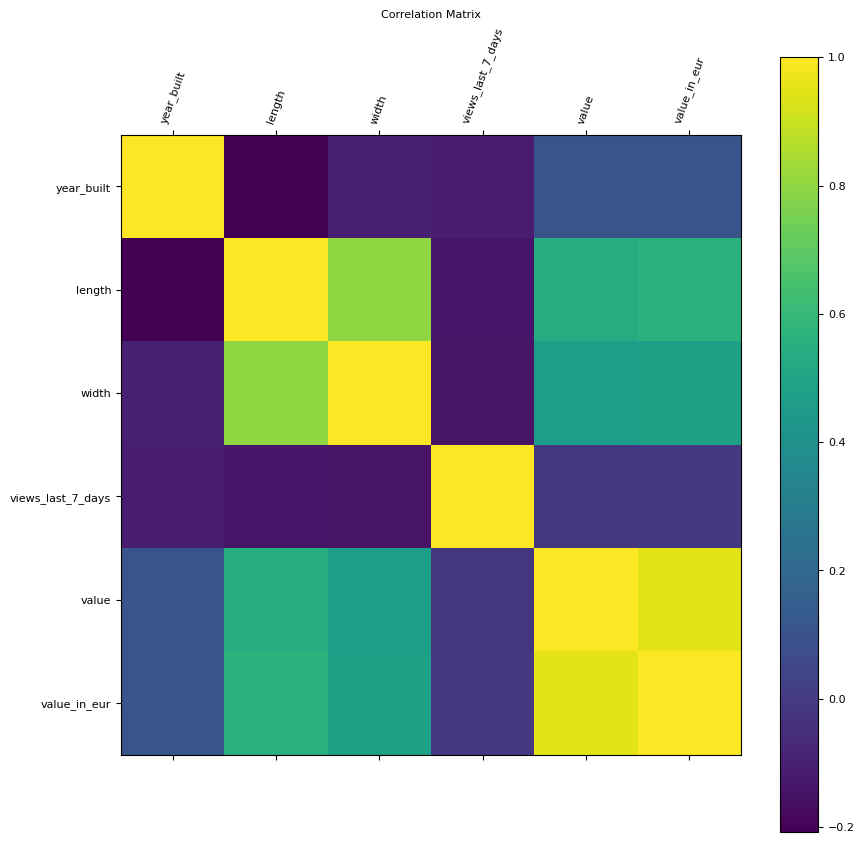

In [19]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df_boats_cor.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_boats_cor.shape[1]), df_boats_cor.columns, fontsize=8, rotation=70) # x axis labels
plt.yticks(range(df_boats_cor.shape[1]), df_boats_cor.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix', fontsize=8) # add title

In [20]:
#### comments to the correlation heatmap

0: no relationship
0.1–0.3: weak relationship
0.3–0.5: moderate relationship
0.5–1.0: strong relationship




On the correlation Matrix we see that there is a  relationship between value and year, value and lenght, value and width, value and the views last 7 days. As well as the relationship between width and length (which is understandable) 

Lets take a look on how strong this relationship is.

Year built to value (weak relationship 0.106) 
length and width  to value (moderate relationship 0.542 and 0.462 accordingly)
Length to width (strong relationship 0.795) which is reasonable


The reason for no other correlation is that the boats have different types (used new etc) Therefore we must create different subsets for each category in order to find out other relations e

# creating another columns to create another subsets for correlation

In [21]:
df_boats_cleaned['type'].nunique()

25

In [22]:
df_boats_cleaned[['type_ad','type_ad_DROP']]=df_boats_cleaned['type'].str.split(',', 1, expand=True)

In [23]:
df_boats_cleaned.head()

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country,type_ad,type_ad_DROP
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337,Switzerland,new boat from stock,None
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490,Germany,new boat from stock,None
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367,Denmark,new boat from stock,None
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399,Germany,new boat from stock,None
4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600,Switzerland,Used boat,Unleaded


In [24]:
df_boats_cleaned[['boat_type_clean','Boat_Type_DROP']]=df_boats_cleaned['boat_type'].str.split(',', 1, expand=True)

In [25]:
df_boats_cleaned.head()

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country,type_ad,type_ad_DROP,boat_type_clean,Boat_Type_DROP
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337,Switzerland,new boat from stock,None,Motor Yacht,None
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490,Germany,new boat from stock,None,Center console boat,None
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367,Denmark,new boat from stock,None,Sport Boat,None
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399,Germany,new boat from stock,None,Fishing Boat,None
4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600,Switzerland,Used boat,Unleaded,Catamaran,None


In [26]:
df_boats_cleaned.isnull().sum()

boat_type               0
manufacturer            0
type                    0
year_built              0
length                  0
width                   0
material                0
views_last_7_days       0
currency                0
value                   0
value_in_eur            0
country                 0
type_ad                 0
type_ad_DROP         2121
boat_type_clean         0
Boat_Type_DROP       8911
dtype: int64

In [27]:
#df_boats_cleaned.drop(labels=['boat_type'], axis=1, inplace=True)

In [28]:
#df_boats_cleaned.drop(labels=['type'], axis=1, inplace=True)

In [29]:
#df_boats_cleaned.drop(labels=['type_ad_DROP'], axis=1, inplace=True)

In [30]:
#df_boats_cleaned.drop(labels=['Boat_Type_DROP'], axis=1, inplace=True)

In [31]:
df_boats_cleaned.isnull().sum()

boat_type               0
manufacturer            0
type                    0
year_built              0
length                  0
width                   0
material                0
views_last_7_days       0
currency                0
value                   0
value_in_eur            0
country                 0
type_ad                 0
type_ad_DROP         2121
boat_type_clean         0
Boat_Type_DROP       8911
dtype: int64

In [32]:
df_boats_cleaned.head()

,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country,type_ad,type_ad_DROP,boat_type_clean,Boat_Type_DROP
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337,Switzerland,new boat from stock,None,Motor Yacht,None
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490,Germany,new boat from stock,None,Center console boat,None
2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367,Denmark,new boat from stock,None,Sport Boat,None
3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399,Germany,new boat from stock,None,Fishing Boat,None
4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600,Switzerland,Used boat,Unleaded,Catamaran,None


In [33]:
df_boats_cleaned['type_ad'].value_counts(100)

Used boat              0.772628
new boat from stock    0.179830
new boat on order      0.026001
Display Model          0.012293
Diesel                 0.006201
Unleaded               0.002393
unknown                0.000544
Electric               0.000109
Name: type_ad, dtype: float64

In [34]:
df_boats_cleaned['boat_type_clean'].value_counts(100)

Motor Yacht            0.281223
Sport Boat             0.137402
Flybridge              0.127611
Trawler                0.071258
Pilothouse             0.061358
Cabin Boat             0.061249
Hardtop                0.054830
Center console boat    0.038838
Bowrider               0.029700
Deck Boat              0.026980
Classic                0.020997
Fishing Boat           0.016971
House Boat             0.014252
Mega Yacht             0.010553
Pontoon Boat           0.009791
Runabout               0.008050
Wakeboard/Wakesurf     0.005766
Offshore Boat          0.005766
Launch                 0.005548
Working Boat           0.004352
Passenger boat         0.003808
Catamaran              0.002285
Water ski              0.000979
Motorsailer            0.000218
Ketch                  0.000109
RIB                    0.000109
Name: boat_type_clean, dtype: float64

# WHAT TO DO 

# create categories of engine, create categories of used and new without unavailable for engines

In [35]:
# creating new categories in order to create a subset for corr analysis
df_boats_cleaned['boat_condition'] = 'unknown'
df_boats_cleaned.loc[df_boats_cleaned['type_ad'] == 'Used boat', 'boat_condition'] = 'used'
df_boats_cleaned.loc[df_boats_cleaned['type_ad'].isin(['new boat from stock','new boat on order']), 'boat_condition'] = 'new'

In [36]:
df_boats_cleaned['boat_condition'].value_counts(dropna = False)

used       7102
new        1892
unknown     198
Name: boat_condition, dtype: int64

In [37]:
# creating subset for new boats 
# creating subset for old boats 
df_boats_corr_new_boats = df_boats_cleaned[df_boats_cleaned['boat_condition'] == 'new']

In [38]:
# creating subset for old boats 
df_boats_corr_used_boats = df_boats_cleaned[df_boats_cleaned['boat_condition'] == 'used']

In [39]:
df_boats_corr_new_boats.corr()

,year_built,length,width,views_last_7_days,value,value_in_eur
year_built,1.000000,-0.041742,-0.066557,0.042186,-0.032285,0.018619
length,-0.041742,1.000000,0.779439,0.017675,0.754091,0.767914
width,-0.066557,0.779439,1.000000,-0.003854,0.536624,0.539567
views_last_7_days,0.042186,0.017675,-0.003854,1.000000,0.078089,0.103930
value,-0.032285,0.754091,0.536624,0.078089,1.000000,0.921680
value_in_eur,0.018619,0.767914,0.539567,0.103930,0.921680,1.000000


In [40]:
df_boats_corr_used_boats.corr()

,year_built,length,width,views_last_7_days,value,value_in_eur
year_built,1.000000,-0.097157,0.035883,-0.108772,0.155121,0.159081
length,-0.097157,1.000000,0.785076,-0.180160,0.576338,0.583172
width,0.035883,0.785076,1.000000,-0.204478,0.511865,0.515305
views_last_7_days,-0.108772,-0.180160,-0.204478,1.000000,-0.043073,-0.042178
value,0.155121,0.576338,0.511865,-0.043073,1.000000,0.979634
value_in_eur,0.159081,0.583172,0.515305,-0.042178,0.979634,1.000000


In [41]:
df_boats_corr_new_boats = df_boats_corr_new_boats[['year_built', 'length','width','views_last_7_days','value','value_in_eur']]

In [42]:
df_boats_corr_used_boats = df_boats_corr_used_boats[['year_built', 'length','width','views_last_7_days','value','value_in_eur']]

Text(0.5, 1.0, 'Correlation Matrix')

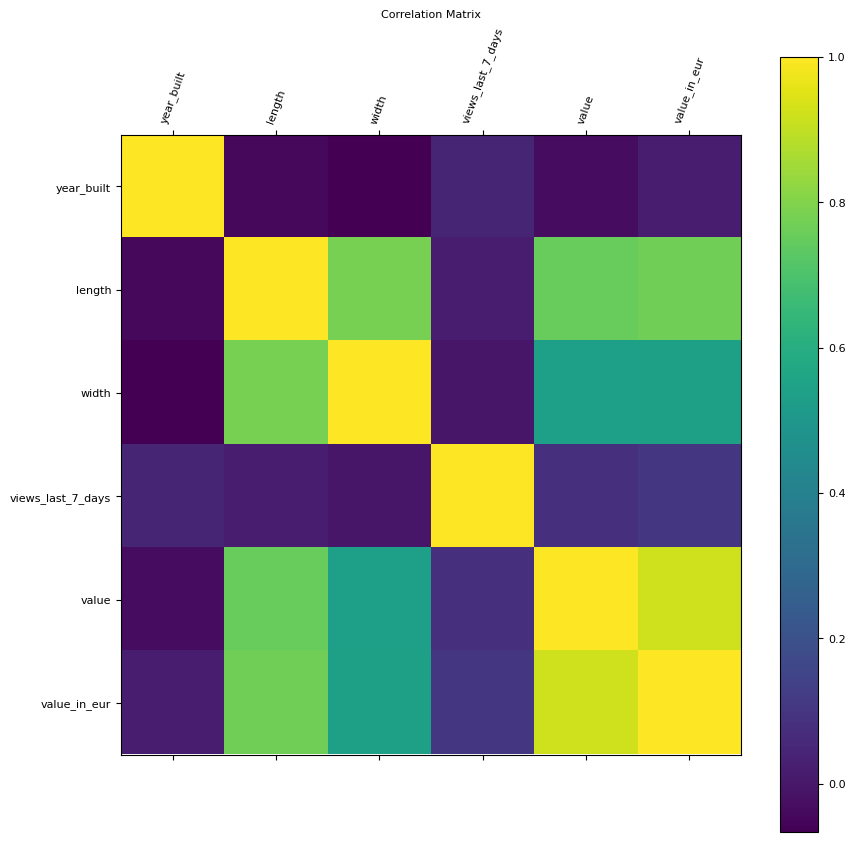

In [43]:
# HEatmap new boats

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df_boats_corr_new_boats.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_boats_corr_new_boats.shape[1]), df_boats_corr_new_boats.columns, fontsize=8, rotation=70) # x axis labels
plt.yticks(range(df_boats_corr_new_boats.shape[1]), df_boats_corr_new_boats.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix', fontsize=8) # add title

# comments to the heatmap with new boats
We can see that there is a strong correlation between value length and width and weak correlation between value and views in the last 7 days in the category new boat. there is also moderate correlation between year built and views last 7 days


Text(0.5, 1.0, 'Correlation Matrix')

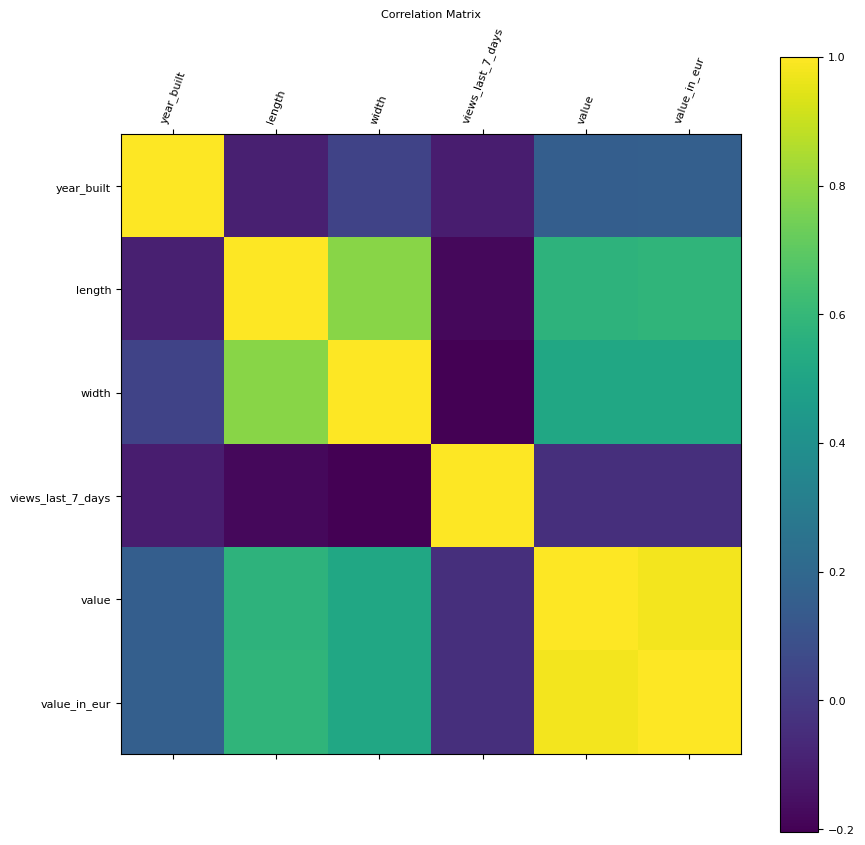

In [44]:
# heatmap used boats

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df_boats_corr_used_boats.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_boats_corr_used_boats.shape[1]), df_boats_corr_used_boats.columns, fontsize=8, rotation=70) # x axis labels
plt.yticks(range(df_boats_corr_used_boats.shape[1]), df_boats_corr_used_boats.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix', fontsize=8) # add title

# comments to the heatmap with used boats
here we see much stronger correlation relationship between values in general. 
value to year built and views. This can be due to more boats in this category.

# Scatterplot of the whole data set

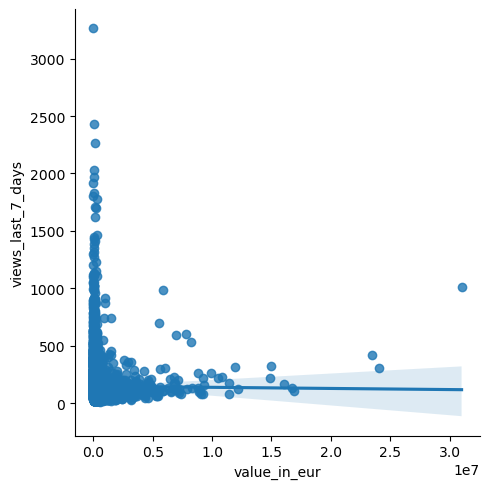

In [45]:
sns.lmplot(x = 'value_in_eur', y = 'views_last_7_days', data = df_boats_cleaned)

# We can see that amount of views comes higher when the price goes down. Also the highest price has more views, which could be caused by curiosity of customers visiting platform in order to see which boats are the most expensive ones, but in general the platform is mostly used by people who are interested to buy boats which costs less than 

# Scatterplot of used boats

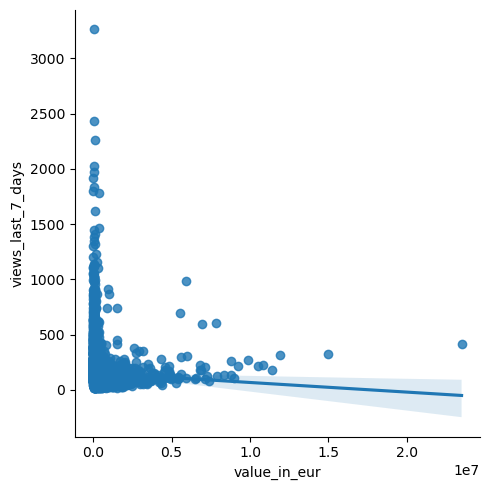

In [46]:
sns.lmplot(x = 'value_in_eur', y = 'views_last_7_days', data = df_boats_corr_used_boats)

# here we can see negative trend, however still as less the boat costs as more views it has in the category of used boats

# Scatterplot of new boats

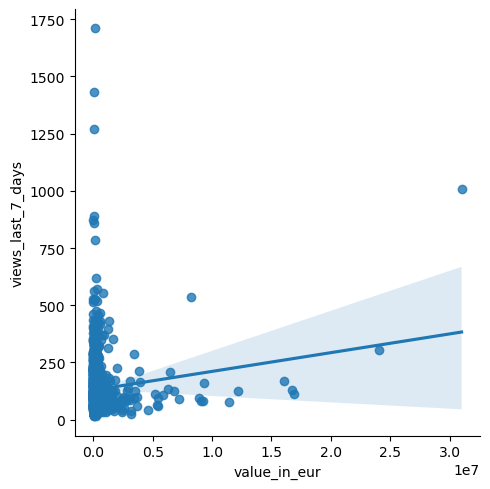

In [47]:
sns.lmplot(x = 'value_in_eur', y = 'views_last_7_days', data = df_boats_corr_new_boats)

# What is intersting is that in the new boats category amount of views increase as more the value is. Nevertheless the majority remain as in the whole data set. Lower price has more views.

# Pair Plots

In [48]:
# Keep only the variables you want to use in the pair plot
df_Pair_plot_all = df_boats_cleaned[['year_built', 'length','views_last_7_days','value_in_eur']]

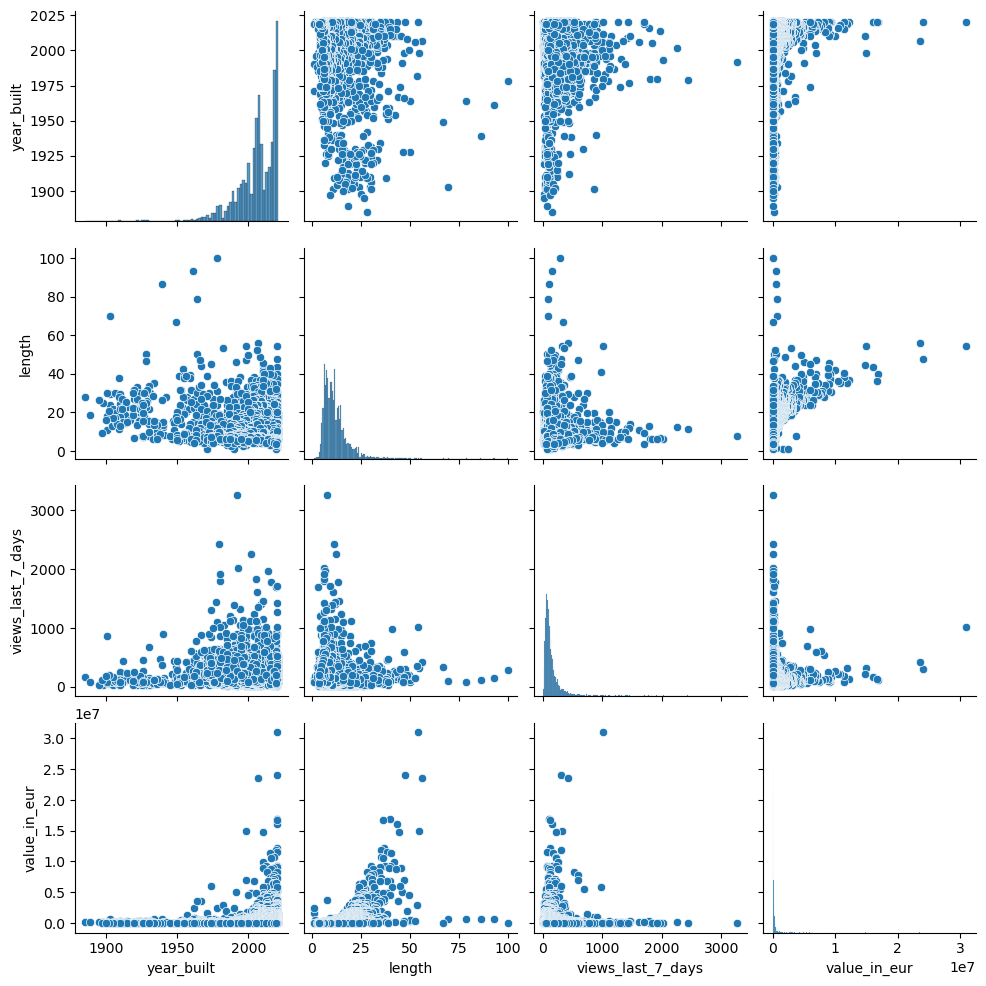

In [49]:
# pair plot with all the boats
pair_plot_all = sns.pairplot(df_Pair_plot_all)

# Based on the pair plot it would be interesting to analyze views within last 7 days based on different criterias since it shows different behaviour in compare to other values. we can take a look on views within last 7 days and criterias like material, boat type and country

# Creating categorical plots

<AxesSubplot:xlabel='value_in_eur', ylabel='Count'>

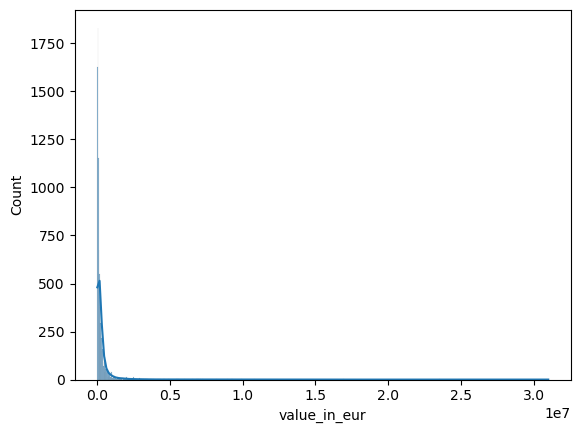

In [50]:
sns.histplot(df_boats_cleaned['value_in_eur'], bins = 1000, kde = True)

# due to highest price influencing on the categorical plot we can not see easily how to distribute categories
# Therefore we need to find out minimum price, middle and maximum price via quantiles in order to create categories.


In [51]:
df_boats_cleaned['value_in_eur'].quantile([0.25, 0.50, 0.75])

0.25     44993.75
0.50     95829.50
0.75    249525.75
Name: value_in_eur, dtype: float64

In [52]:
# creating categories based on the outcome


In [53]:
df_boats_cleaned.loc[df_boats_cleaned['value_in_eur'] < 44993.75, 'price_range'] = 'low'

In [54]:
df_boats_cleaned.loc[(df_boats_cleaned['value_in_eur'] >= 44993.75) & (df_boats_cleaned['value_in_eur'] < 249525.75),
                     'price_range'] = 'middle'

In [55]:
df_boats_cleaned.loc[df_boats_cleaned['value_in_eur'] >= 249525.75, 'price_range'] = 'high'

In [56]:
df_boats_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9192 entries, 0 to 9191
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   boat_type          9192 non-null   object 
 1   manufacturer       9192 non-null   object 
 2   type               9192 non-null   object 
 3   year_built         9192 non-null   int64  
 4   length             9192 non-null   float64
 5   width              9192 non-null   float64
 6   material           9192 non-null   object 
 7   views_last_7_days  9192 non-null   int64  
 8   currency           9192 non-null   object 
 9   value              9192 non-null   int64  
 10  value_in_eur       9192 non-null   int32  
 11  country            9192 non-null   object 
 12  type_ad            9192 non-null   object 
 13  type_ad_DROP       7071 non-null   object 
 14  boat_type_clean    9192 non-null   object 
 15  Boat_Type_DROP     281 non-null    object 
 16  boat_condition     9192 

In [57]:
df_boats_cleaned['price_range'].value_counts(dropna = False)

middle    4596
low       2298
high      2298
Name: price_range, dtype: int64

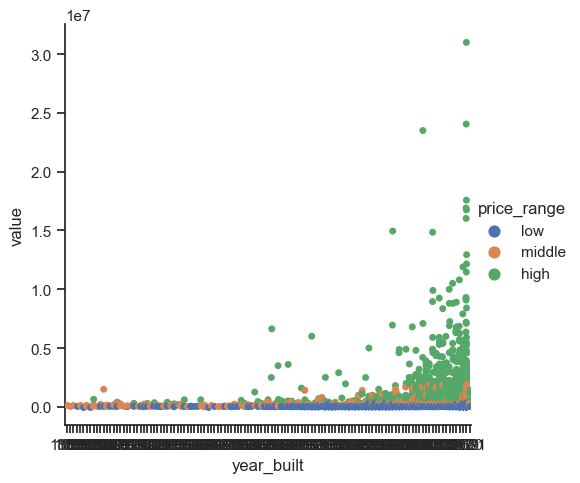

In [58]:
# Create a categorical plot in seaborn using the price range

sns.set(style="ticks")
categorical_plot = sns.catplot(x='year_built', y='value', hue='price_range', data=df_boats_cleaned)

# at the categorical plot we see that as newer the boat is as more value it has. There is a same distribution of low price range among years, and more middle price boats which are new in compare to the older ones

<AxesSubplot:xlabel='year_built', ylabel='Count'>

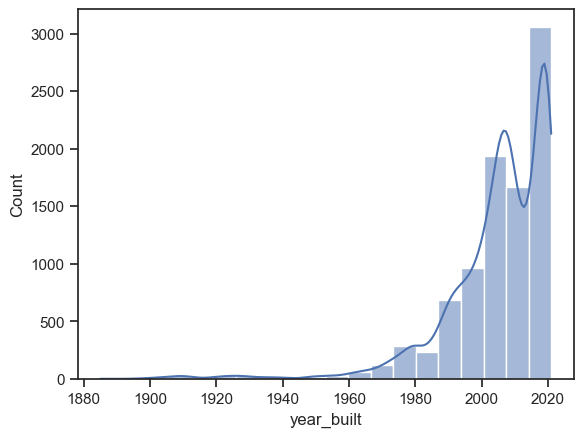

In [59]:

sns.histplot(df_boats_cleaned['year_built'], bins = 20, kde = True)

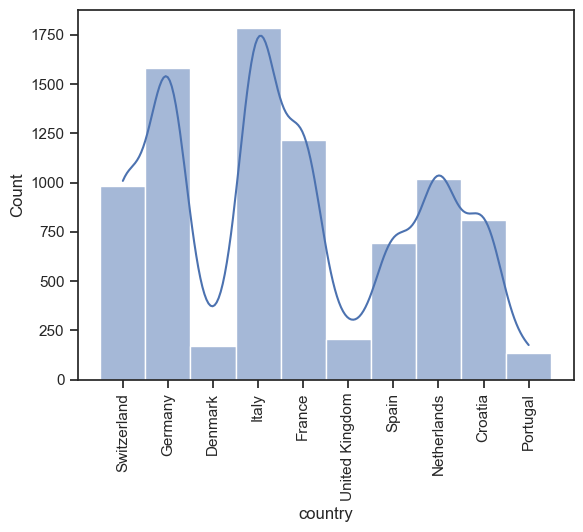

In [68]:
# Count the frequency of each value in the 'country' column
counts = df_boats_cleaned['country'].value_counts()

# Select the top 10 values
top_10 = counts.nlargest(10).index

# Filter the dataframe to only include rows that have a 'country' value that is in the top 10
df_top_10 = df_boats_cleaned[df_boats_cleaned['country'].isin(top_10)]

# Create the histogram plot
sns.histplot(df_top_10['country'], bins = 100, kde = True)

# Rotate the x-axis labels
plt.xticks(rotation = 90)
# Show the plot
plt.show()

# Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.


- characteristics of the most viewed boat listings in the last 7 days 
Newest short boats in a lower price range are those with most views within the last 7 days

- is it the most expensive boats that get the most views?
Nevertheless expensive boats has some high views that could be due to curiosity, however the less boat costs the most views it has
- Are there common features among the most viewed boats?
Until now I could find out that they all are mostly cheap and short. Further analysis needed to find out more insights
- Which countries has the most boats?
As we saw in the previous graph boats are mostly sold in Italy, Germany France and Netherlends. 
- Is there any relation to unknown values and amount of views? 
Further analysis needed

### all the figures will be saved later on at the final analysis 

In [69]:
# exporting new data set
df_boats_cleaned.to_csv(os.path.join(path, '02 Prepared Data', '27.01.df_boats_cleaned.csv'))